### Resumen estadistico y Revision de Tipos de Datos

In [10]:
import pandas as pd

movies_df = pd.read_csv('../data/movies_dataset_transformed.csv')
credits_df = pd.read_csv('../data/filtered_credits.csv')
# Resumen estadístico
print("Resumen estadístico de movies_df:")
print(movies_df.describe(include='all'))

print("\nResumen estadístico de credits_df:")
print(credits_df.describe(include='all'))

# Revisión de tipos de datos
print("\nTipos de datos en movies_df:")
print(movies_df.dtypes)

print("\nTipos de datos en credits_df:")
print(credits_df.dtypes)

Resumen estadístico de movies_df:
       belongs_to_collection        budget genres      id original_language  \
count                  45466  4.546600e+04  43024   45466             45455   
unique                     1           NaN   4068   45436                92   
top                       {}           NaN  Drama  141971                en   
freq                   45466           NaN   5000       3             32269   
mean                     NaN  4.224300e+06    NaN     NaN               NaN   
std                      NaN  1.742359e+07    NaN     NaN               NaN   
min                      NaN  0.000000e+00    NaN     NaN               NaN   
25%                      NaN  0.000000e+00    NaN     NaN               NaN   
50%                      NaN  0.000000e+00    NaN     NaN               NaN   
75%                      NaN  0.000000e+00    NaN     NaN               NaN   
max                      NaN  3.800000e+08    NaN     NaN               NaN   

                 

### Analisis de distribuciones con Histogramas y Boxplots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots para columnas numéricas, omitiendo valores no numéricos y NaNs
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    # Filtrar NaNs para evitar problemas
    clean_data = movies_df[col].dropna()
    sns.boxplot(x=clean_data)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
for col in numeric_cols:
    if pd.api.types.is_numeric_dtype(movies_df[col]):
        plt.figure(figsize=(10, 4))
        clean_data = movies_df[col].dropna()
        sns.boxplot(x=clean_data)
        plt.title(f'Boxplot de {col}')
        plt.xlabel(col)
        plt.show()
    else:
        print(f'Columna {col} no es numérica y será omitida para el boxplot.')


### Relaciones entre variables

In [ ]:
# Definir columnas numéricas
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']

# Visualizar relaciones entre variables numéricas usando gráficos de dispersión
for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i+1:]:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=movies_df, x=col1, y=col2)
        plt.title(f'Relación entre {col1} y {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()


### Outliers o Anomalias

In [ ]:
# Crear gráficos de caja para columnas numéricas
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=movies_df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

### Patrones Interesantes:

##### Frecuencia de Generos 

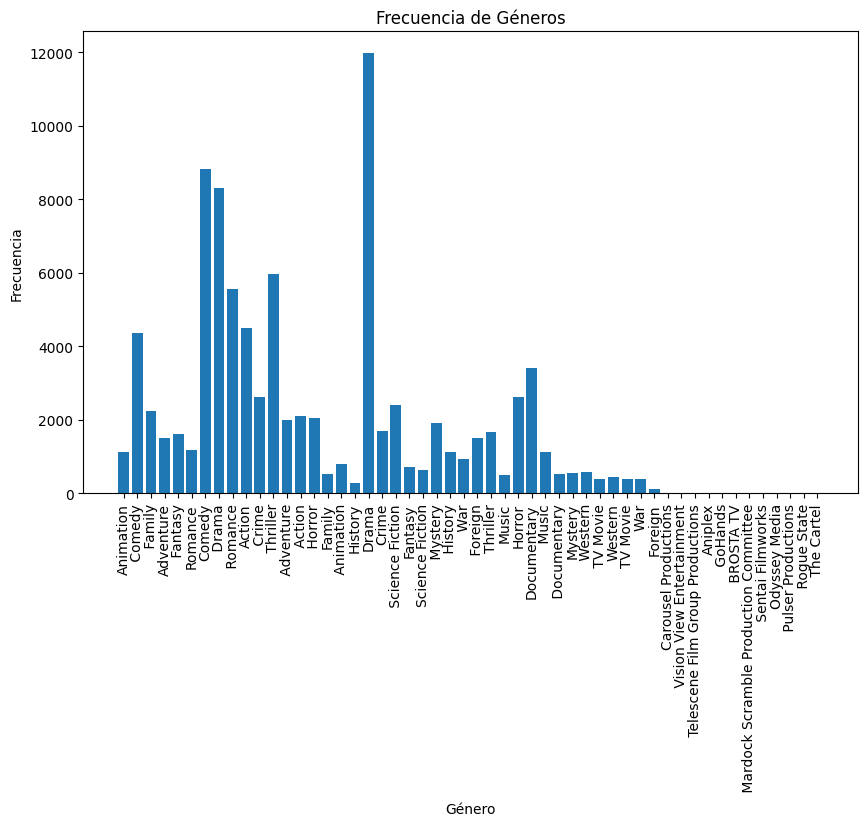

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar frecuencia de géneros
all_genres = ','.join(movies_df['genres'].dropna()).split(',')
genre_counts = Counter(all_genres)

# Gráfico de barras de géneros
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xticks(rotation=90)
plt.title('Frecuencia de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()



##### Numeros de peliculas por ano

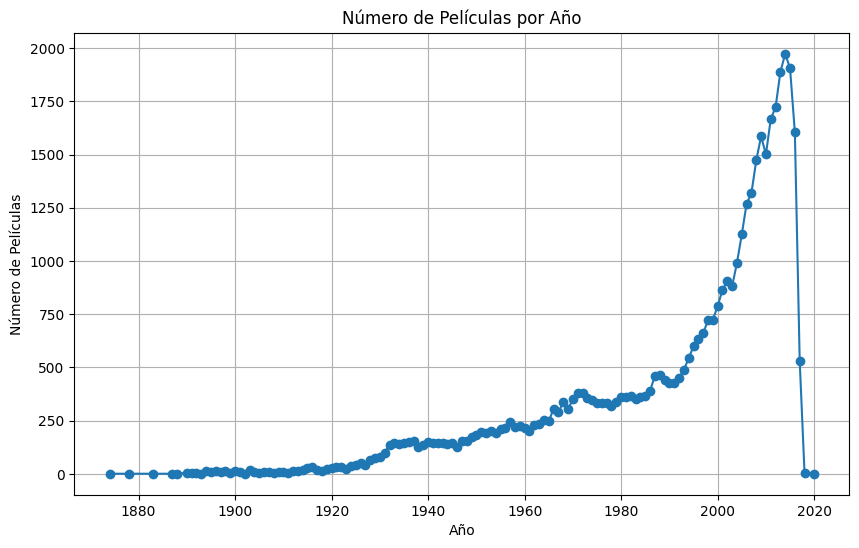

In [24]:
# Contar el número de películas por año
movies_per_year = movies_df['release_year'].value_counts().sort_index()

# Gráfico de líneas de películas por año
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()


### Nubes de palabras / WordCloud

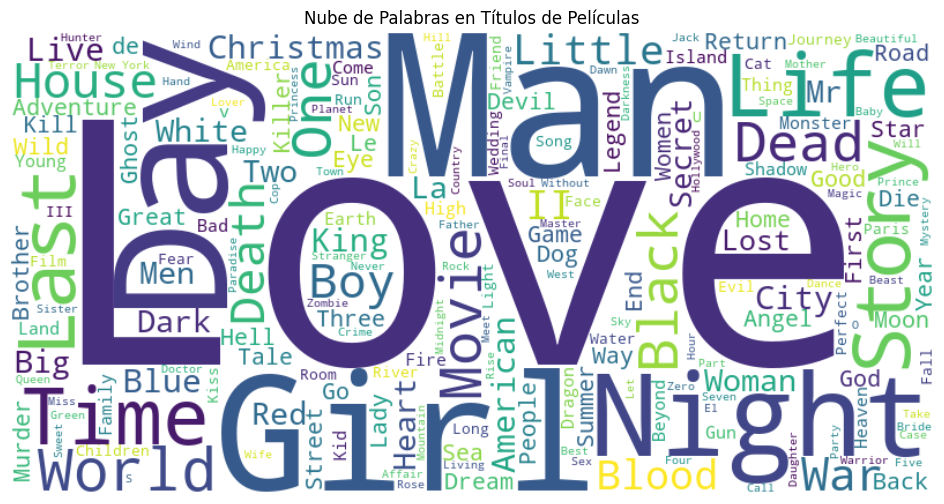

In [21]:
from wordcloud import WordCloud

# Crear una nube de palabras para los títulos de las películas
text = ' '.join(movies_df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Títulos de Películas')
plt.show()